In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change the directory to the project folder
import os

os.getcwd()

'/Users/haeinpark/Projects/Data_Science_Projects/Titanic_Survival/copy_and_write/Alexis_Cook'

In [3]:
os.chdir('../../')

os.getcwd()

'/Users/haeinpark/Projects/Data_Science_Projects/Titanic_Survival'

In [6]:
# print the names of the data

for root, dir, files in os.walk('./data'):
    for file in files:
        print(os.path.join(root, file))

./data/test.csv
./data/train.csv
./data/gender_submission.csv


In [7]:
# Load data

train_data = pd.read_csv('./data/train.csv')

test_data = pd.read_csv('./data/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Women v.s. Men. Check to see the ratio of survived in both gender
women = train_data[train_data.Sex == 'female']['Survived']

women = sum(women)/len(women)

print(women)

0.7420382165605095


In [11]:
men = train_data[train_data.Sex == 'male']['Survived']

men = sum(men)/len(men)

print(men)

0.18890814558058924


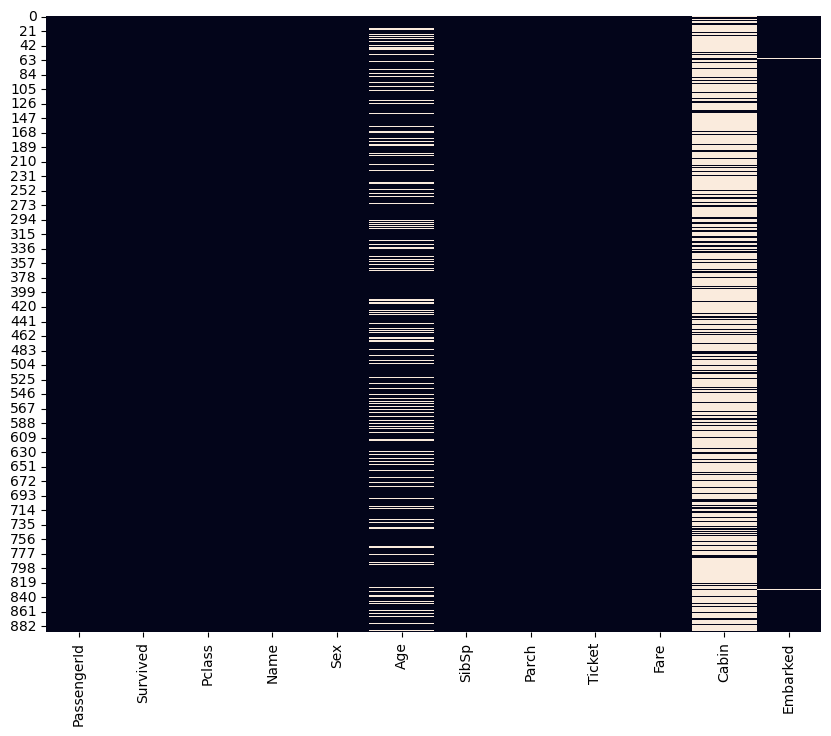

In [12]:
# visualize the missing values and drop some
plt.figure(figsize=(10, 8))

sns.heatmap(train_data.isnull(), cbar=False)

plt.show()

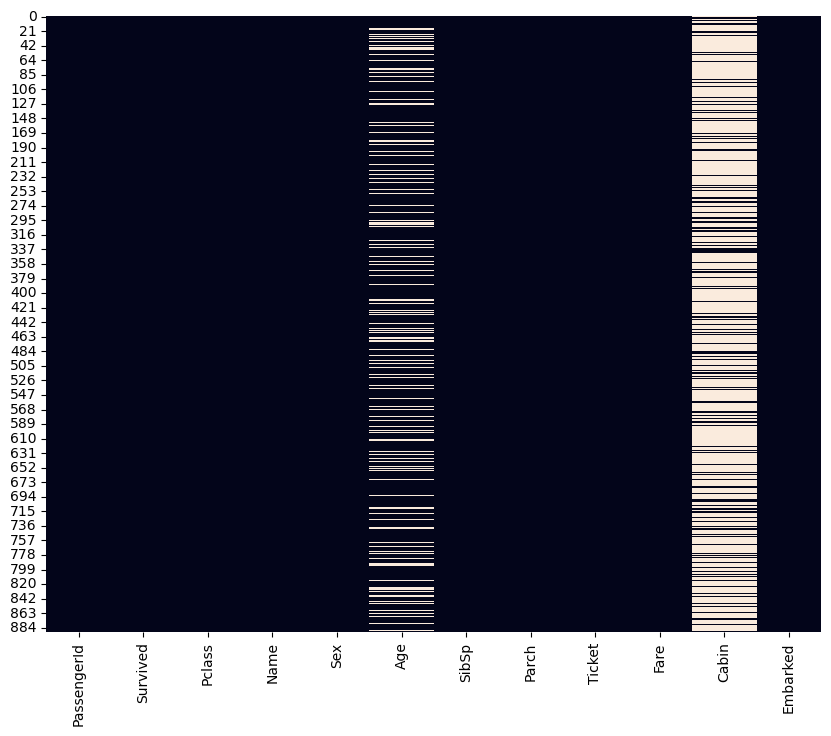

In [13]:
# Drop NA for Embarked column

drop_na_train = train_data.dropna(subset='Embarked')

plt.figure(figsize=(10, 8))

sns.heatmap(drop_na_train.isnull(), cbar=False)

plt.show()

In [14]:
# Get train, test data after transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

categorical_features = drop_na_train[features].select_dtypes(include=['object', 'category']).columns.to_list()
numerical_features = drop_na_train[features].select_dtypes(include='number').columns.to_list()

# Column transformers
col_trans = ColumnTransformer(
    [
        ('categorical', OneHotEncoder(drop='first', sparse_output=False, dtype='int'), categorical_features),
        ('numerical', StandardScaler(), numerical_features)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

# Fit the data
col_trans.fit(drop_na_train.drop(columns='Survived'))

transformed_X_train = col_trans.transform(drop_na_train.drop(columns='Survived'))
transformed_X_test = col_trans.transform(test_data)

X_train = pd.DataFrame(transformed_X_train, columns=col_trans.get_feature_names_out())
X_test = pd.DataFrame(transformed_X_test, columns=col_trans.get_feature_names_out())
y_train = drop_na_train['Survived']

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [15]:
output.to_csv('submission.csv')

print("Your Submission file is successfully saved!")

Your Submission file is successfully saved!
